<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Evaluation Metrics
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Evaluation Metrics in Machine Learning

Evaluate model performance by selecting appropriate metrics for different problem types (regression and classification) and understand validation strategies to obtain reliable estimates of performance on unseen (test) data.

## Model Evaluation Strategies

### Initial Data Split

Normally we have a single dataset which we split into two **disjoint** subsets: Training and Test.

- **Why do we split the data?**: To avoid overfitting. A model can memorize training data perfectly but fail on data it has never seen. The test set simulates new data.
- **Disjoint**: There must be no overlap between Training and Test. Any test sample must not have been seen during training or preprocessing.
- **Proportions**: Typical ratios 70/30, 80/20 (Training/Test). Depends on dataset size.
- **Randomness**: The split should be random, especially if data has ordering (client1, client2, ...). Time series are different.
- **Stratification**: For classification with imbalanced classes, use a stratified split (preserves class proportions).

<div style="text-align: center;">
    <img src="./images/metrics/train_test_sets.png" style="width:40%">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit
import seaborn as sns
import yfinance as yf

Label distribution in the original dataset

In [4]:
# Read the data from the CSV file into a Pandas DataFrame.
data = pd.read_csv("../../MachineLearning/dataset/credit-score-classification_train-processed.csv")
data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Month,Credit_Mix,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,10.27,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,2


Credit_Score
2    0.53174
1    0.28998
0    0.17828
Name: count, dtype: float64


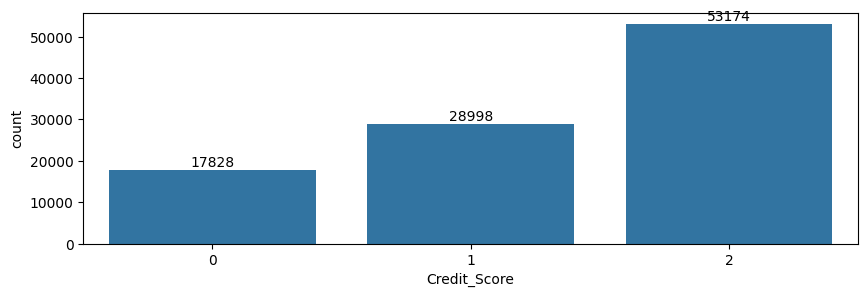

In [5]:
print(data.loc[:, "Credit_Score"].value_counts() / data.shape[0])

plt.figure(figsize=(10, 3))
ax = sns.countplot(data=data, x="Credit_Score")
ax.bar_label(ax.containers[0])
plt.show()

Train/Test distribution without shuffle

In [6]:
features_columns = data.columns[:-1]  # All columns except the last.
label_column = data.columns[-1]  # The last column (label).
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=False
)

Credit_Score
2    0.530987
1    0.292888
0    0.176125
Name: count, dtype: float64
Credit_Score
2    0.53475
1    0.27835
0    0.18690
Name: count, dtype: float64


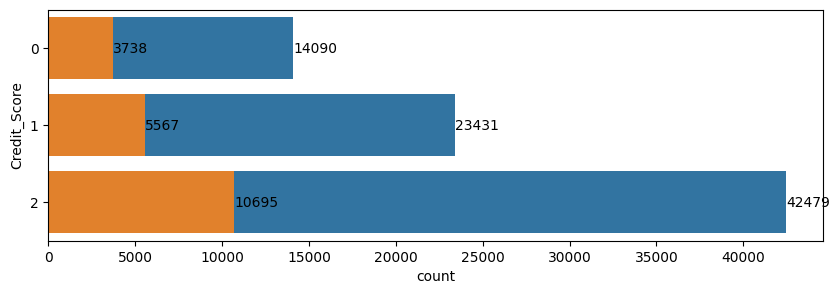

In [7]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Train/Test distribution with shuffle

In [8]:
features_columns = data.columns[:-1]  # All columns except the last.
label_column = data.columns[-1]  # The last column (label).
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=True
)

Credit_Score
2    0.532188
1    0.289050
0    0.178762
Name: count, dtype: float64
Credit_Score
2    0.52995
1    0.29370
0    0.17635
Name: count, dtype: float64


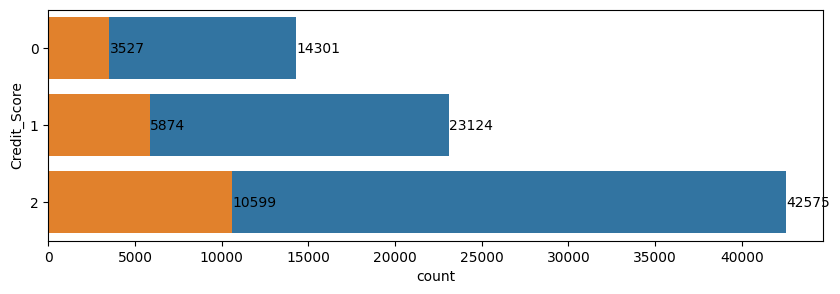

In [9]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Train/Test distribution with stratification

In [10]:
features_columns = data.columns[:-1]  # All columns except the last.
label_column = data.columns[-1]  # The last column (label).
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns],
    data.loc[:, label_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data.loc[:, label_column],
)

Credit_Score
2    0.531737
1    0.289988
0    0.178275
Name: count, dtype: float64
Credit_Score
2    0.53175
1    0.28995
0    0.17830
Name: count, dtype: float64


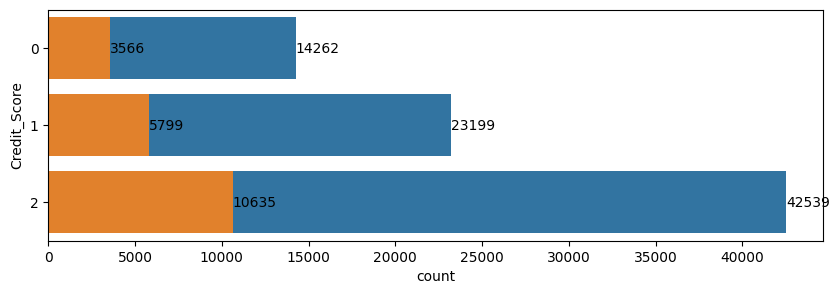

In [11]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Splitting a dataset with a time index

In [12]:
idx_price_path = "../../MachineLearning/dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

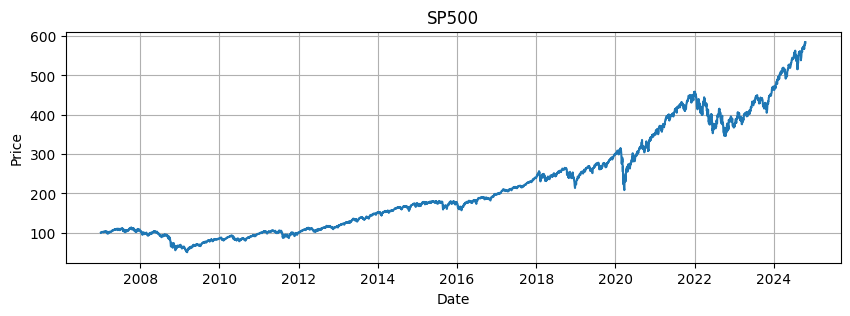

In [13]:
plt.figure(figsize=(10, 3))
plt.plot(data_idx, label="SP500")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Beware of how Pandas works with loc !!

Ref.: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

> Warning
>
> Note that contrary to usual python slices, both the start and the stop are included

2007-01-03 00:00:00 2020-12-31 00:00:00
2020-12-31 00:00:00 2024-10-18 00:00:00


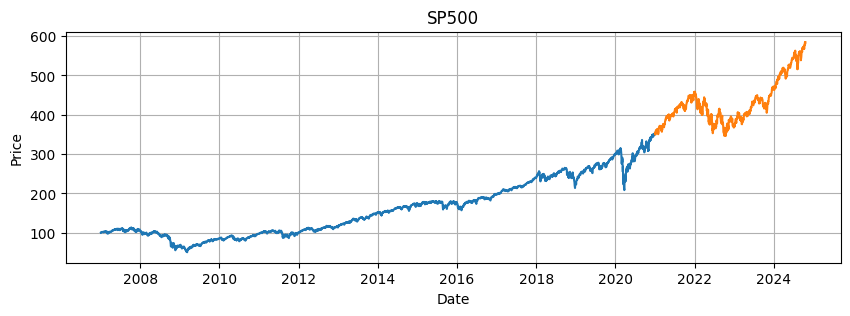

In [14]:
start_date = data_idx.index[0]
end_date = "2020-12-31"

X_train_idx = data_idx.loc[start_date:end_date]
X_test_idx = data_idx.loc[end_date:]

print(X_train_idx.index.min(), X_train_idx.index.max())
print(X_test_idx.index.min(), X_test_idx.index.max())

plt.figure(figsize=(10, 3))
plt.plot(X_train_idx, label="Train")
plt.plot(X_test_idx, label="Test")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Use iloc or set the dates manually.

2007-01-03 00:00:00 2020-12-31 00:00:00
2021-01-04 00:00:00 2024-10-18 00:00:00


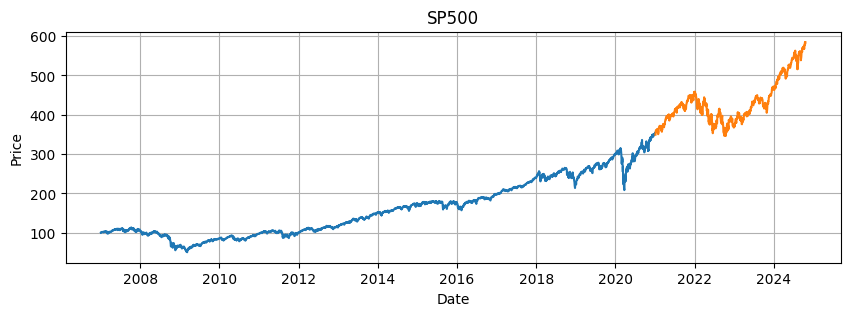

In [15]:
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

print(X_train_idx.index.min(), X_train_idx.index.max())
print(X_test_idx.index.min(), X_test_idx.index.max())

plt.figure(figsize=(10, 3))
plt.plot(X_train_idx, label="Train")
plt.plot(X_test_idx, label="Test")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### The Sacred Role of the Test Set

Once split, **only training data is used** for normalization, hyperparameter tuning and model selection. **You CANNOT decide which model to use based on the test set**. The test simulates production.

- **Golden Rule**: The Test set is used **ONLY ONCE**, at the very end, to obtain an unbiased estimate of final model performance.
- **Data Leakage**: If you use test data to make modeling decisions (feature selection, hyperparameters, algorithm), you leak information. Reported performance will be inflated and not generalize (this is commonly seen online).
- Examples of **Exclusive Training Use**:
    - **Normalization/Scaling**: Compute mean, std, min, max ONLY on training then apply to train and test.
    - **Hyperparameter Selection**: Best k in KNN, tree depth, etc.
    - **Model Selection**: Compare several models.

So **how do we evaluate models** during development?

### Simple Validation (Holdout)

To avoid using the Test set during development, we create a *mini-test set* from the original training set called *validation*.

**Process**

- Split 1: Original Data -> Training_Full / Test
- Split 2: Training_Full -> Training_Dev / Validation

<div style="text-align: center;">
    <img src="./images/metrics/train_test_validation_sets.png" style="width:50%">
</div>

**Usage**

1. Train the model on Training_Dev.
2. Evaluate and tune hyperparameters on Validation.
3. Compare multiple models on Validation.
4. After selecting final model and hyperparameters, retrain using all Training_Full (Dev + Validation) to leverage more data before the final Test evaluation.

**Disadvantage**: Performance on Validation can be sensitive to how that split was done, especially with small datasets.

In [16]:
features_columns = data.columns[:-1]  # All columns except the last.
label_column = data.columns[-1]  # The last column (label).

# Split 1.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=True
)
# Split 2.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(64000, 40) (64000,)
(16000, 40) (16000,)
(20000, 40) (20000,)


### Cross Validation (K-Fold CV)

We split training data into K folds. Use K-1 folds for training and 1 for validation, rotating the validation fold. Repeat K times.

This **reduces potential overfitting** compared to simple validation, since each sample is used for both training and validation exactly once.

<div style="text-align: center;">
    <img src="./images/metrics/cross_validation_sets.png" style="width:40%">
</div>

**Process**

1. First split all available data into Train and Test.
    - Train is used for K-Fold CV.
2. Split Train into K folds.

**Usage**

1. Training:
    - Iteration 1 (Split 1): Train with Folds 2..K; validate with Fold 1.
    - Iteration 2 (Split 2): Train with Folds 1,3..K; validate with Fold 2.
    - [...]
    - Iteration K (Split K): Train with all except Fold K; validate with Fold K.

2. Obtain **K performance metrics** (one per validation fold).
    - Average them for overall performance.
    - Compute standard deviation to understand variability.
3. Use mean and std to **select hyperparameters** or **compare models**.
4. After selecting the best model/hyperparameters, **train on ALL training data** and **evaluate ONCE on Test**.

**Variants**:
- Stratified K-Fold: For imbalanced classification; preserves class ratios.

In [17]:
def visualize_split(train_index, val_index):
    v = np.ones(len(train_index) + len(val_index))
    v[val_index] = 0
    plt.figure(figsize=(10, 2))
    sns.heatmap(
        [v],
        cmap="binary",
        cbar=False,
        xticklabels=False,
        yticklabels=False,
    )
    plt.grid(True)
    plt.title("Train/Val split")
    plt.xlabel("Index")
    plt.ylabel("Train/Val")
    plt.show()

X_train: (80000, 40), y_train: (80000,)
X_test: (20000, 40), y_test: (20000,)
Fold 0:
  Train: index=[    0     1     2 ... 79996 79997 79999]; len=64000
  Val:   index=[    3    10    11 ... 79991 79995 79998]; len=16000


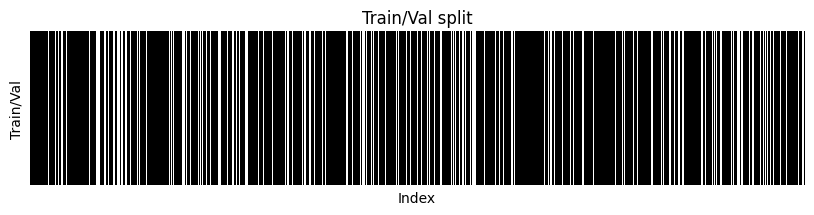

Fold 1:
  Train: index=[    0     2     3 ... 79995 79997 79998]; len=64000
  Val:   index=[    1     9    26 ... 79993 79996 79999]; len=16000


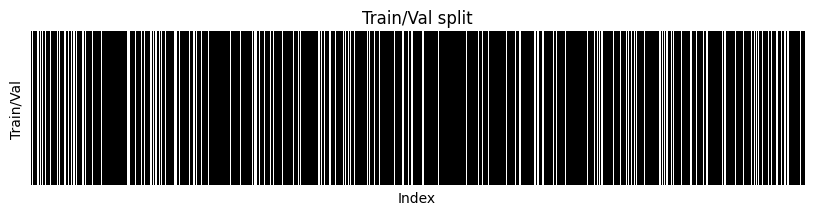

Fold 2:
  Train: index=[    1     3     4 ... 79997 79998 79999]; len=64000
  Val:   index=[    0     2     5 ... 79989 79990 79992]; len=16000


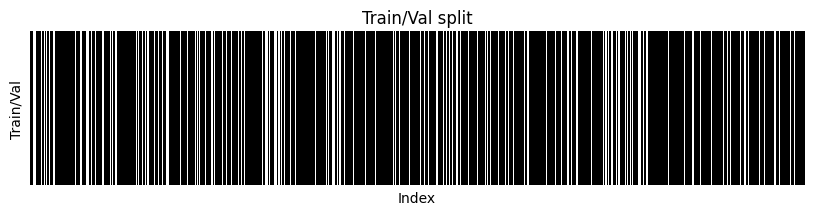

Fold 3:
  Train: index=[    0     1     2 ... 79996 79998 79999]; len=64000
  Val:   index=[    6     8    12 ... 79964 79983 79997]; len=16000


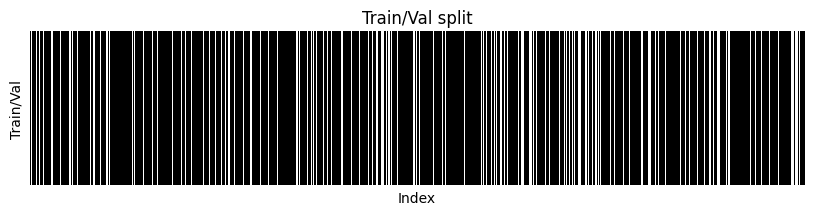

Fold 4:
  Train: index=[    0     1     2 ... 79997 79998 79999]; len=64000
  Val:   index=[    4    16    17 ... 79986 79987 79994]; len=16000


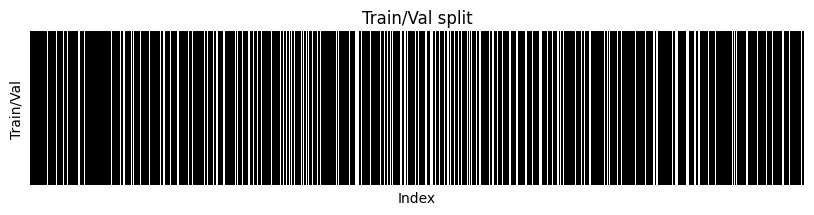

In [18]:
# Read the data from the CSV file into a Pandas DataFrame.
data = pd.read_csv("../../MachineLearning/dataset/credit-score-classification_train-processed.csv")

# Train-Test Split.
features_columns = data.columns[:-1]  # All columns except the last.
label_column = data.columns[-1]  # The last column (label).
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns],
    data.loc[:, label_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data.loc[:, label_column],
)

# Dataset sizes.
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}; len={len(train_index)}")
    print(f"  Val:   index={val_index}; len={len(val_index)}")
    visualize_split(train_index, val_index)

### Alternatives to K-Fold for Time Series

In time series (e.g., asset returns) **plain k-fold is not appropriate** (random partition of blocks disregarding time order) for practical and theoretical reasons:

1. **Data Leakage**
   If you train on later periods and validate on an earlier fold you learn *future* patterns to predict the *past*. Models must only use past information.
2. **Temporal Dependence & Autocorrelation**
   Many series are autocorrelated: today depends on yesterday. Using non-contiguous blocks breaks continuity (trends, seasonality, shocks).
3. **Better CV alternatives**
   * **Rolling window**
   * **Expanding window**
   * **Purged k-fold**: remove gaps to avoid leakage.

TimeSeries k-fold CV without purge

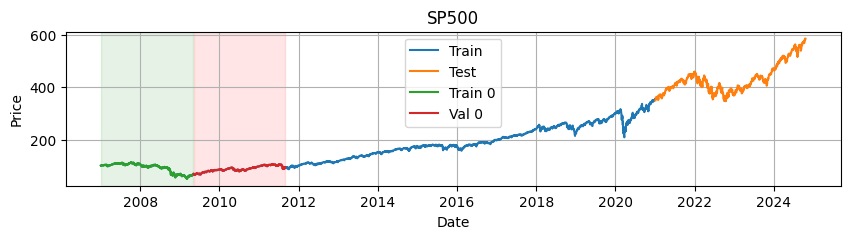

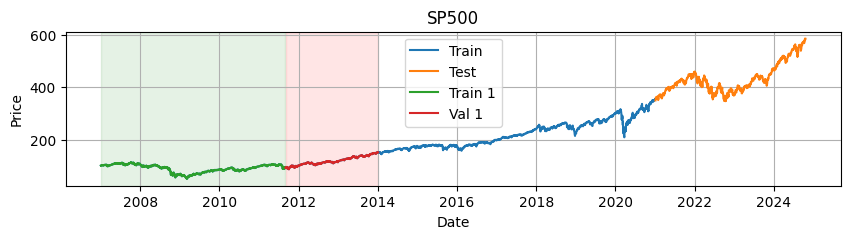

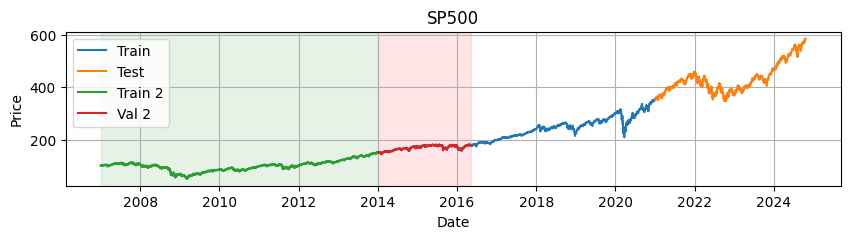

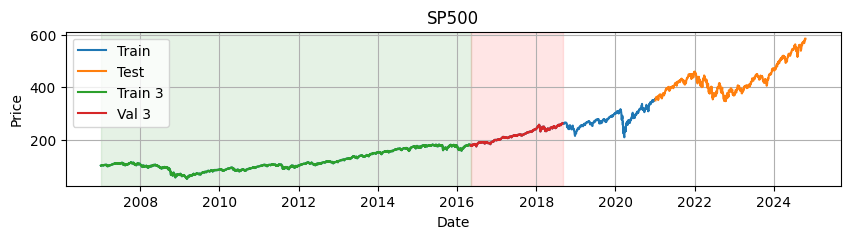

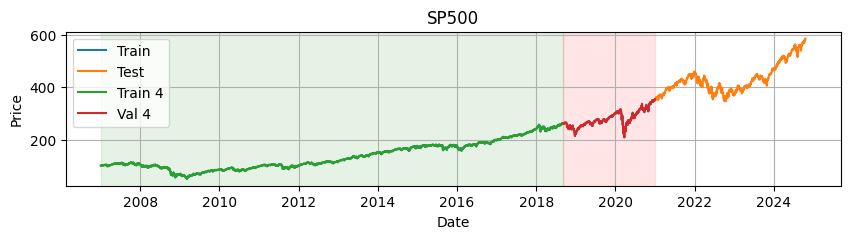

In [19]:
# Read index price data into a DataFrame.
idx_price_path = "../../MachineLearning/dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

# Train-test split.
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

# TimeSeries k-fold CV without purge.
tscv = TimeSeriesSplit(n_splits=5, gap=0)

for i, (train_index, val_index) in enumerate(tscv.split(X_train_idx)):
    plt.figure(figsize=(10, 2))
    plt.plot(X_train_idx, label="Train")
    plt.plot(X_test_idx, label="Test")
    plt.plot(X_train_idx.iloc[train_index], label=f"Train {i}")
    plt.plot(X_train_idx.iloc[val_index], label=f"Val {i}")
    plt.axvspan(X_train_idx.index[train_index[0]], X_train_idx.index[train_index[-1]], color="green", alpha=0.1)
    plt.axvspan(X_train_idx.index[val_index[0]], X_train_idx.index[val_index[-1]], color="red", alpha=0.1)
    plt.grid(True)
    plt.title("SP500")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

TimeSeries k-fold CV with purge

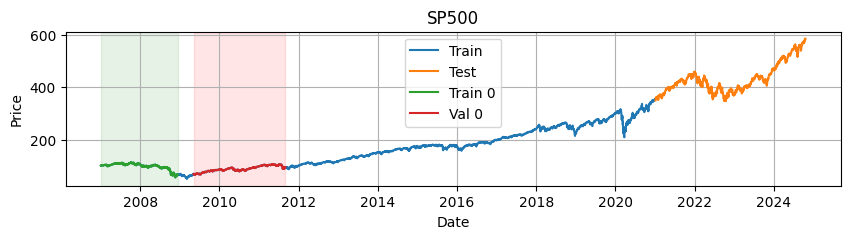

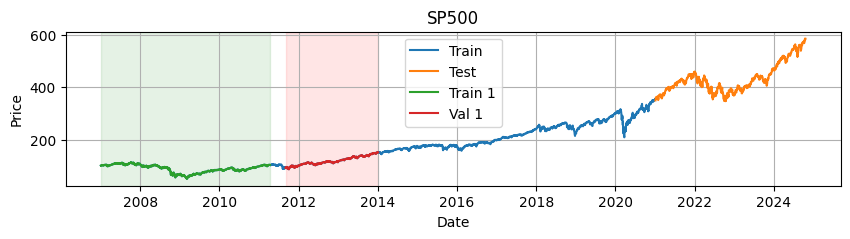

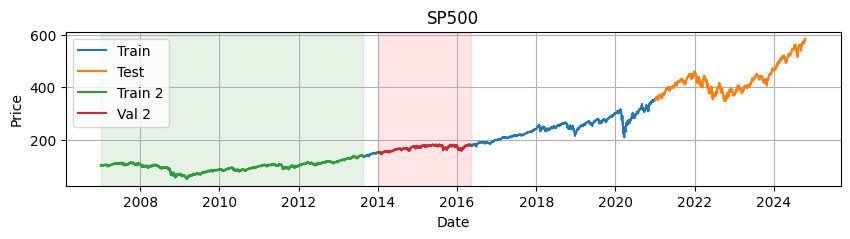

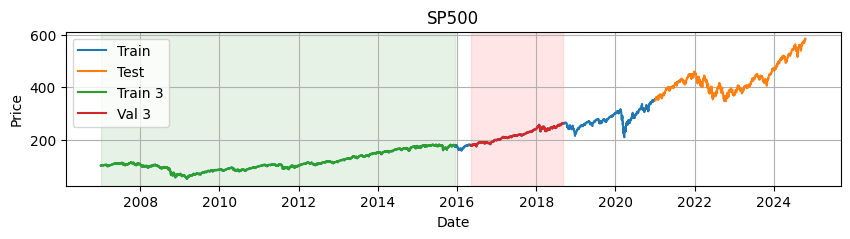

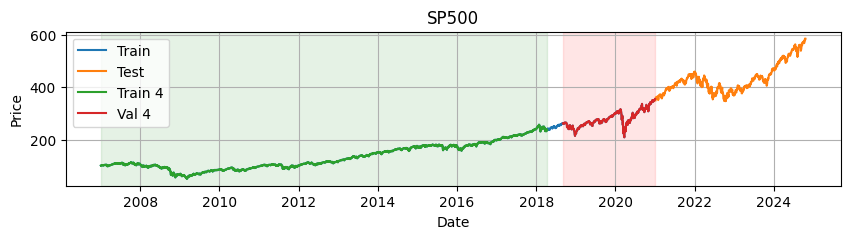

In [20]:
# Read index price data into a DataFrame.
idx_price_path = "../../MachineLearning/dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

# Train-test split.
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

# TimeSeries k-fold CV with purge (gap).
tscv = TimeSeriesSplit(n_splits=5, gap=100)

for i, (train_index, val_index) in enumerate(tscv.split(X_train_idx)):
    plt.figure(figsize=(10, 2))
    plt.plot(X_train_idx, label="Train")
    plt.plot(X_test_idx, label="Test")
    plt.plot(X_train_idx.iloc[train_index], label=f"Train {i}")
    plt.plot(X_train_idx.iloc[val_index], label=f"Val {i}")
    plt.axvspan(X_train_idx.index[train_index[0]], X_train_idx.index[train_index[-1]], color="green", alpha=0.1)
    plt.axvspan(X_train_idx.index[val_index[0]], X_train_idx.index[val_index[-1]], color="red", alpha=0.1)
    plt.grid(True)
    plt.title("SP500")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

## Evaluation Metrics

### Which Metrics Do We Use?

Depends on whether it is a **regression** or **classification** problem.

### Regression Metrics

- **Mean Absolute Error (MAE)**

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

    - **Interpretation**: Average absolute difference between actual ($ y_i $) and predicted ($ \hat{y}_i $) values.
    - **Units**: Same as target variable. Intuitive.
    - **Sensitivity**: Less sensitive to outliers than MSE.

- **Mean Squared Error (MSE)**

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

    - **Interpretation**: Average squared error. Penalizes large errors.
    - **Units**: Squared units of target. Less intuitive.
    - **Sensitivity**: Very sensitive to outliers.
    - **Use**: Common training loss.

- **Root Mean Squared Error (RMSE)**

  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

    - **Interpretation**: Brings units back. Easier than MSE, keeps large error sensitivity.

- **Coefficient of Determination (R²)**

  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \mu)^2}
  $$
  where $ \mu $ is the mean of actual values.

    - **Interpretation**: Proportion of variance explained.
    - **Range**:
        - $ R^2 = 1 $: Perfect explanation
        - $ R^2 = 0 $: Explains nothing
        - $ R^2 < 0 $: Worse than predicting the mean
    - **Warning**: Increases when adding variables even if irrelevant. Use adjusted R² to penalize unnecessary predictors.

### Classification Metrics - Confusion Matrix

The confusion matrix underpins most classification metrics. It compares predicted classes to actual classes.

- Positive/Negative: Define a target class (positive) and the other (negative).
    - **TP (True Positive)**: Correct positive
    - **FP (False Positive)**: Incorrect positive
    - **FN (False Negative)**: Missed positive
    - **TN (True Negative)**: Correct negative

<div style="text-align: center;">
    <img src="./images/metrics/matriz_confusion_clasificacion.png" style="width:50%">
</div>

### Classification Metric Formulas

1. **Accuracy**: Proportion of correct predictions. Useful with balanced classes. **Warning**: Misleading with imbalance.

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

2. **Precision**: Among predicted positives, how many are correct. Use when false positives are costly.
    - Example: Investing in a startup (positive). A FP means investing and losing money; FN = missed opportunity.

$$
precision = \frac{TP}{TP + FP}
$$

3. **Recall**: Among actual positives, how many captured. Use when false negatives are costly.
    - Example: AML systems; FN = regulatory breach and reputational loss.

$$
recall = \frac{TP}{TP + FN}
$$

4. **F1 Score**: Harmonic mean of precision and recall. Good compromise for imbalance.

$$
F1score = \frac{2 \times precision \times recall}{precision + recall}
$$

### Impact of Confidence Threshold on Metrics

Ref.: https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

Suppose:

<table>
    <tr>
        <th>y_true</th>
        <td>1</td><td>1</td><td>0</td><td>1</td><td>0</td>
        <td>1</td><td>0</td><td>1</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <th>y_hat_proba</th>
        <td>0.95</td><td>0.85</td><td>0.75</td><td>0.65</td><td>0.55</td>
        <td>0.45</td><td>0.35</td><td>0.25</td><td>0.15</td><td>0.05</td>
    </tr>
</table>

We vary the threshold above which the classifier predicts positive (1) else 0.

Classifier output is the probability for each class; we interpret >= threshold as class 1.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def compute_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1}

In [22]:
y_true = np.array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])
y_hat_proba = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05])

threshold = 0.5
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Results with threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.7
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Results with threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.9
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Results with threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.3
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Results with threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.2
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Results with threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

Results with threshold=0.5:
  accuracy: 0.6000
  precision: 0.6000
  recall: 0.6000
  f1-score: 0.6000
--------------------------------------------------
Results with threshold=0.7:
  accuracy: 0.6000
  precision: 0.6667
  recall: 0.4000
  f1-score: 0.5000
--------------------------------------------------
Results with threshold=0.9:
  accuracy: 0.6000
  precision: 1.0000
  recall: 0.2000
  f1-score: 0.3333
--------------------------------------------------
Results with threshold=0.3:
  accuracy: 0.6000
  precision: 0.5714
  recall: 0.8000
  f1-score: 0.6667
--------------------------------------------------
Results with threshold=0.2:
  accuracy: 0.7000
  precision: 0.6250
  recall: 1.0000
  f1-score: 0.7692
--------------------------------------------------


## Multi-Class and Multi-Label Classification

### Multi-Class Classification

A problem is multi-class when we have **more than 2 mutually exclusive labels** (belonging to one excludes the others).
- Iris dataset: setosa / versicolor / virginica
- Trading: buy / sell / hold
- Sentiment: positive / negative / neutral

Some classifiers are natively multi-class:
- KNN looks at nearest neighbors and assigns one of k classes.

<div style="text-align: center">
    <img src="./images/metrics/knn.webp" style="width:25%;background-color: white; padding: 10px;">
</div>

- Others: Decision Trees, Random Forests.

<div style="text-align: center">
    <img src="./images/metrics/Structure-of-Decision-Tree-Algorithm.png" style="width:30%;background-color: white; padding: 10px;">
</div>

Others are inherently binary:
- Support Vector Machine (SVM)

<div style="text-align: center">
    <img src="./images/metrics/svm_separating_hyperplanes.png" style="width:25%;background-color: white; padding: 10px;">
</div>

- Naive Bayes

$$
\frac{P(x|y=1)P(y=1)}{P(x|y=0)P(y=0)}
$$

- Logistic Regression

$$
P(y=1|x) = \sigma(w^T x + b)
$$

and require strategies to adapt to multi-class problems.

### One-vs-Rest (OvR) for Multi-Class
Also called One-vs-All (OvA).

Train one binary model for each class distinguishing that class from all others.
- Class A vs Non-A
- Class B vs Non-B
- [...]

<div style="text-align: center">
    <img src="./images/metrics/one-vs-rest-table.png" style="width:60%;background-color: white; padding: 10px;">
</div>

- Each model predicts membership to its class.
- Combine outputs for a single answer.
- If multiple models give high probability we resolve with normalization.

### OvR with Softmax

The **softmax function** converts a real-valued vector into a **probability vector** (values in $[0,1]$ summing to 1).

Given $\mathbf{z} = (z_1, z_2, \dots, z_K)$:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad i=1..K
$$

In our case $\mathbf{z}$ combines OvR classifier scores:

$$\mathbf{z} = (0.90, 0.25, 0.95) \implies \text{softmax}(\mathbf{z}) = (0.389, 0.203, 0.408)$$

In [23]:
import numpy as np


def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability (avoid overflow)
    return exp_z / np.sum(exp_z, axis=0)


z = np.array((0.90, 0.25, 0.95))
softmax_z = softmax(z)

print(f"Softmax: {softmax_z}")

Softmax: [0.38860352 0.20286883 0.40852765]


### Multi-Label Classification

A multi-label problem allows ZERO, ONE or MULTIPLE labels simultaneously per instance.

Examples:
- What is in the image? A dog, two people, a car.
- What is the text about? Politics, economy, mental health.
- Which entities are impacted by the news? Repsol, Iberdrola, Iberia.

Neural Networks can natively support multi-label.

KNN and purely binary classifiers need adaptation.

### One-vs-Rest (OvR) for Multi-Label

As before, train one binary classifier per label. All that predict *belongs* are included in output.

Issues:
- **Invalid combinations** (e.g., "Pregnant" & "Male").
- **Label correlation** (e.g., "Thriller" & "Suspense").

Metrics:
- Hamming Loss: fraction of wrong labels.
- Jaccard Index: intersection / union of predicted vs true labels.

### Other Multi-Label Approaches - Label Ranking

We can treat it as a **ranking task**, selecting the top N labels. Common in recommender systems.

Process:
- Each of L binary classifiers produces a score.
- Sort labels by score.
- Select top N (or those above a threshold).

Metrics:
- Precision@k
- Recall@k

In [ ]:
def precision_at_k(y_true, y_score, k):
    """
    Compute precision at k for each sample then return the average precision.

    Parameters:
      y_true: List/array of true label index sets per sample.
      y_score: List/array of score arrays per sample (one score per label).
      k: Top-k cutoff.

    Returns:
      Mean precision@k across samples.
    """
    precision_scores = []  # Store precision per sample.
    for trues, score in zip(y_true, y_score):  # Iterate each (true labels, scores) pair.
        top_k = score.argsort()[::-1][:k]  # Indices of top-k scores descending.
        hits = sum([1 for i in top_k if i in trues])  # Count how many top-k are in true labels.
        precision_scores.append(hits / k)  # Sample precision.
    return sum(precision_scores) / len(precision_scores)  # Mean precision.


def recall_at_k(y_true, y_score, k):
    """
    Compute recall at k for each sample then return the average recall.

    Parameters:
      y_true: List/array of true label index sets per sample.
      y_score: List/array of score arrays per sample.
      k: Top-k cutoff.

    Returns:
      Mean recall@k across samples.
    """
    recall_scores = []  # Store recall per sample.
    for trues, score in zip(y_true, y_score):  # Iterate each sample.
        top_k = score.argsort()[::-1][:k]  # Indices of top-k scores.
        hits = sum([1 for i in top_k if i in trues])  # Count correct labels in top-k.
        # If there are true labels compute hits/len(trues); else 0.
        recall_scores.append(hits / len(trues) if len(trues) > 0 else 0)
    return sum(recall_scores) / len(recall_scores)  # Mean recall.